# **Milestone 1**
## Fatalities in the Israeli-Palestinian Conflict from 2000 - 2023
Nama: Rahardiansyah Fatoni

Batch: RMT-027

## 1. Identifying Problems with SMART Framework

- **Specific**: The analysis will include `demographic`, `geospatial`, and `fatality trend`.
- **Measurable**: Gained insight on correlation between variables mentioned earlier.
- **Achievable**: The dataset contains 11124 entries that is going to help wth the analysis.
- **Relevant**: An analysis is now more relevant than ever to understand the current ongoing conflict.
- **Time-bound**: Data analysis will be done in 2 days.

**Problem Statement**: To identify the details of fatalities happening in the Israeli-Palestinian conflict from 2000 - 2023 (prior to October 2023).

**5W + 1H Questions**:
1. **What** is the mostly used weapon in the conflict?
1. **Where** is the district region with the most conflict?
3. **Who** is the the most affected by the conflict based on age and gender?
4. **Who** is the most responsible for the fatalities based on citizenship?
5. **When** is there spikes or increase in fatalities in the conflict?


## 2. Data Loading
Sumber: https://www.kaggle.com/datasets/willianoliveiragibin/fatalities-in-the-israeli-palestinian/data

In [ ]:
# IMPORT PANDAS
import pandas as pd

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/rahardianfatoni/datasets/main/fatalities_isr_pse_conflict_2000_to_2023.csv')

In [ ]:
# PREVIEWING DATASET
df

,name,date_of_event,age,citizenship,event_location,event_location_district,event_location_region,date_of_death,gender,took_part_in_the_hostilities,place_of_residence,place_of_residence_district,type_of_injury,ammunition,killed_by,notes
0,'Abd a-Rahman Suleiman Muhammad Abu Daghash,2023-09-24,32.0,Palestinian,Nur Shams R.C.,Tulkarm,West Bank,2023-09-24,M,NaN,Nur Shams R.C.,Tulkarm,gunfire,live ammunition,Israeli security forces,Fatally shot by Israeli forces while standing ...
1,Usayed Farhan Muhammad 'Ali Abu 'Ali,2023-09-24,21.0,Palestinian,Nur Shams R.C.,Tulkarm,West Bank,2023-09-24,M,NaN,Nur Shams R.C.,Tulkarm,gunfire,live ammunition,Israeli security forces,Fatally shot by Israeli forces while trying to...
2,'Abdallah 'Imad Sa'ed Abu Hassan,2023-09-22,16.0,Palestinian,Kfar Dan,Jenin,West Bank,2023-09-22,M,NaN,al-Yamun,Jenin,gunfire,live ammunition,Israeli security forces,Fatally shot by soldiers while firing at them ...
3,Durgham Muhammad Yihya al-Akhras,2023-09-20,19.0,Palestinian,'Aqbat Jaber R.C.,Jericho,West Bank,2023-09-20,M,NaN,'Aqbat Jaber R.C.,Jericho,gunfire,live ammunition,Israeli security forces,Shot in the head by Israeli forces while throw...
4,Raafat 'Omar Ahmad Khamaisah,2023-09-19,15.0,Palestinian,Jenin R.C.,Jenin,West Bank,2023-09-19,M,NaN,Jenin,Jenin,gunfire,live ammunition,Israeli security forces,Wounded by soldiers’ gunfire after running awa...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11119,Binyamin Herling,2000-10-19,64.0,Israeli,Nablus,Nablus,West Bank,2000-10-19,M,Israelis,Kedumim,Tulkarm,gunfire,live ammunition,Palestinian civilians,Killed while hiking on Mt. Eival.
11120,Farid Musa 'Issa a-Nesasreh,2000-10-17,28.0,Palestinian,Beit Furik,Nablus,West Bank,2000-10-17,M,Unknown,Beit Furik,Nablus,gunfire,NaN,Israeli civilians,Killed by a settler from Itamar while harvesti...
11121,Hillel Lieberman,2000-10-07,36.0,Israeli,Nablus,Nablus,West Bank,2000-10-07,M,Israelis,Elon Moreh,Nablus,gunfire,live ammunition,Palestinian civilians,His body was found a day after he disappeared.
11122,Fahed Mustafa 'Odeh Baker,2000-10-07,21.0,Palestinian,Bidya,Salfit,West Bank,2000-10-07,M,No,Bidya,Salfit,gunfire,NaN,Israeli civilians,Killed by settlers who rioted in Biddya village.


## 3. Data Filtering and Cleaning

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11124 entries, 0 to 11123
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   name                          11124 non-null  object 
 1   date_of_event                 11124 non-null  object 
 2   age                           10995 non-null  float64
 3   citizenship                   11124 non-null  object 
 4   event_location                11124 non-null  object 
 5   event_location_district       11124 non-null  object 
 6   event_location_region         11124 non-null  object 
 7   date_of_death                 11124 non-null  object 
 8   gender                        11104 non-null  object 
 9   took_part_in_the_hostilities  9694 non-null   object 
 10  place_of_residence            11056 non-null  object 
 11  place_of_residence_district   11056 non-null  object 
 12  type_of_injury                10833 non-null  object 
 13  a

The columns that will be used for analysis:
`date_of_event`, `age`, `citizenship`, `event_location`(s), `gender`, `ammunition`, and `killed_by`. Hence, to minimize cluttering, we will drop the unused columns.

In [ ]:
df.drop(columns=['name','date_of_death','took_part_in_the_hostilities','place_of_residence','place_of_residence_district','notes'], inplace = True)

In [ ]:
# PREVIEW FILTERED DATA
df

,date_of_event,age,citizenship,event_location,event_location_district,event_location_region,gender,type_of_injury,ammunition,killed_by
0,2023-09-24,32.0,Palestinian,Nur Shams R.C.,Tulkarm,West Bank,M,gunfire,live ammunition,Israeli security forces
1,2023-09-24,21.0,Palestinian,Nur Shams R.C.,Tulkarm,West Bank,M,gunfire,live ammunition,Israeli security forces
2,2023-09-22,16.0,Palestinian,Kfar Dan,Jenin,West Bank,M,gunfire,live ammunition,Israeli security forces
3,2023-09-20,19.0,Palestinian,'Aqbat Jaber R.C.,Jericho,West Bank,M,gunfire,live ammunition,Israeli security forces
4,2023-09-19,15.0,Palestinian,Jenin R.C.,Jenin,West Bank,M,gunfire,live ammunition,Israeli security forces
...,...,...,...,...,...,...,...,...,...,...
11119,2000-10-19,64.0,Israeli,Nablus,Nablus,West Bank,M,gunfire,live ammunition,Palestinian civilians
11120,2000-10-17,28.0,Palestinian,Beit Furik,Nablus,West Bank,M,gunfire,NaN,Israeli civilians
11121,2000-10-07,36.0,Israeli,Nablus,Nablus,West Bank,M,gunfire,live ammunition,Palestinian civilians
11122,2000-10-07,21.0,Palestinian,Bidya,Salfit,West Bank,M,gunfire,NaN,Israeli civilians


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11124 entries, 0 to 11123
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   date_of_event            11124 non-null  object 
 1   age                      10995 non-null  float64
 2   citizenship              11124 non-null  object 
 3   event_location           11124 non-null  object 
 4   event_location_district  11124 non-null  object 
 5   event_location_region    11124 non-null  object 
 6   gender                   11104 non-null  object 
 7   type_of_injury           10833 non-null  object 
 8   ammunition               5871 non-null   object 
 9   killed_by                11124 non-null  object 
dtypes: float64(1), object(9)
memory usage: 869.2+ KB


For now, we shall remove the null values found in `age` and `type_of_injury` columns. The null values in the `ammunition` column will be assumed as intentional.

In [ ]:
df.dropna(subset=['age', 'type_of_injury'], inplace=True)

## 4. Data Analysis
Now, we can finally do the analysis with the cleaned and filtered data, we will answer all the questions we have identified earlier.

In [ ]:
# IMPORT MATPLOTLIB
import matplotlib.pyplot as plt

1. **What** is the mostly used weapon in the conflict?

To answer this question, we will use the .groupby() from Pandas to group the DataFrame by `ammunition` column and `count` as the amount of occurences it showed up on the `df`.

In [ ]:
df_ammunition = df.groupby(['ammunition']).size().reset_index(name='count')

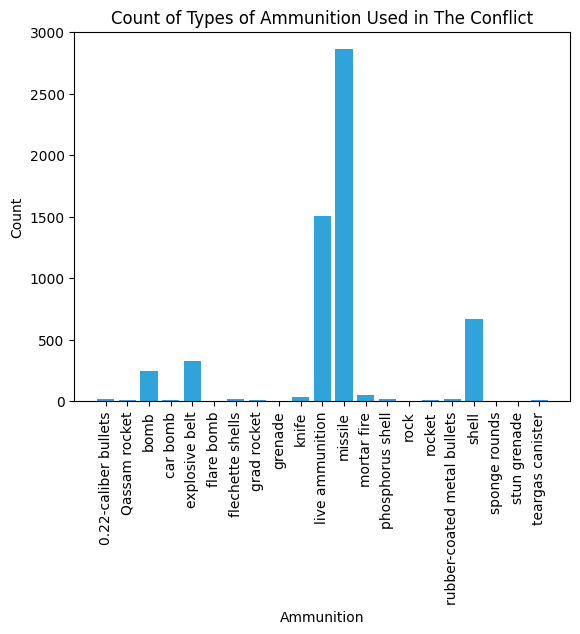

In [ ]:
plt.bar(df_ammunition['ammunition'], df_ammunition['count'], color = "#30A3DA")
plt.xticks(rotation=90)
plt.xlabel('Ammunition')
plt.ylabel('Count')
plt.title('Count of Types of Ammunition Used in The Conflict')
plt.show()

**Insight**:
- Primary Ammunition Type: The insight indicates that missiles are the main ammunition used in the conflict. This implies that the conflict involves advanced weaponry capable of long-range attacks. Missiles are generally sophisticated and can be employed in various military scenarios, including air-to-ground or ground-to-ground operations.
- Frequency of Use: The graph shows that the number of occurrences of missile usage (2861) almost doubles that of live ammunition (1510). This suggests that missiles are extensively employed in the conflict compared to live ammunition.

2. **Where** is the district region with the most conflict?

To answer this question, we will use the .groupby() from Pandas to group the DataFrame by `event_location_district` column and `count` as the amount of occurences it showed up on the `df`.

In [ ]:
df_district = df.groupby(['event_location_district']).size().reset_index(name='count')

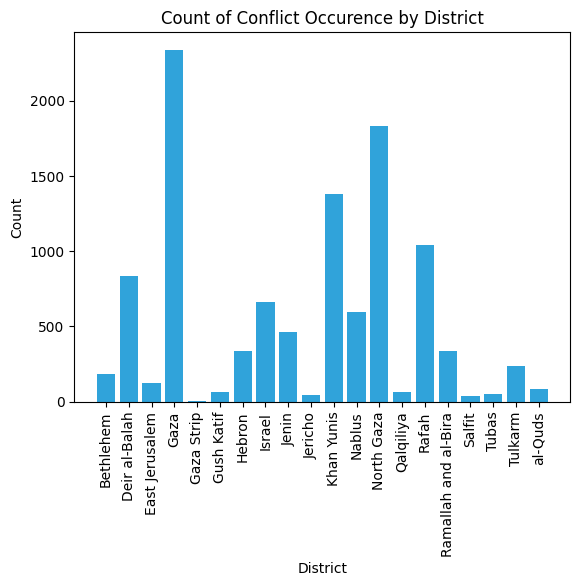

In [ ]:
plt.bar(df_district['event_location_district'], df_district['count'], color = "#30A3DA")
plt.xticks(rotation=90)
plt.xlabel('District')
plt.ylabel('Count')
plt.title('Count of Conflict Occurence by District')
plt.show()

**Insight**:
- Based on the graph, we can conclude that most of the conflict happens in Palestinian territory, with the 3 most occurences happening in Gaza, North Gazam and Khan Yunis by order of frequency.

3. **Who** is the the most affected by the conflict based on age and gender?

First, let's do a simple descriptive analysis of the `age` and `gender` columns.

In [ ]:
print(f"Mean age : {df['age'].mean()}")
print(f"Median age : {df['age'].median()}")
print(f"Mode age : {df['age'].mode()[0]}")
print(f"Standar deviation : {df['age'].std()}")
print(f"Skewness age: {df['age'].skew()}")

Mean age : 26.69143177151391
Median age : 23.0
Mode age : 22.0
Standar deviation : 13.73911107392046
Skewness age: 1.3853387554332095


In [ ]:
print(f"Number of women affected by the conflict : {df['gender'][df['gender'] == 'F'].count()}")
print(f"Number of men affected by the conflict : {df['gender'][df['gender'] == 'M'].count()}")

Number of women affected by the conflict : 1369
Number of men affected by the conflict : 9345


In [ ]:
# FINDING THE UPPER AND LOWER BOUNDARY OF 'age' COLUMN
q1 = df['age'].quantile(0.25)
q3 = df['age'].quantile(0.75)
iqr = q3 - q1

# Tukey's Rule
up_bound = q3 + 1.5 * iqr
low_bound = q1 - 1.5 * iqr

print(f'Upper Boundary: {up_bound:.2f}')
print(f'Lower Boundary: {low_bound:.2f}')

Upper Boundary: 49.00
Lower Boundary: 1.00


Now let us visualize the previous analysis, with `age` as the x-axis and `count` as the amount of occurences it showed up on the `df`.

In [ ]:
df_age = df.groupby('age').size().reset_index(name='count')

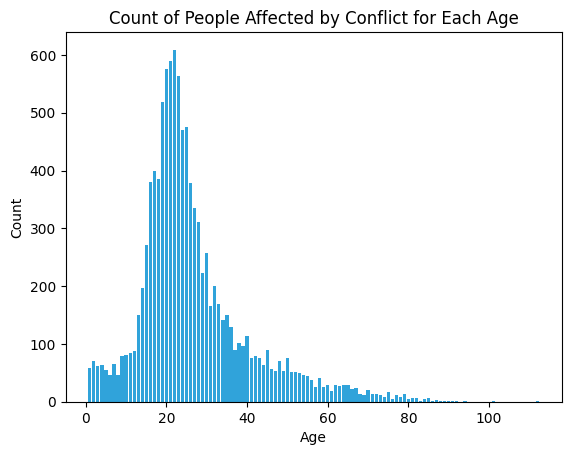

In [ ]:
plt.bar(df_age['age'], df_age['count'], color = "#30A3DA")
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Count of People Affected by Conflict for Each Age')
plt.show()

**Insight**:

- Mean Age (26 years old): The mean age provides an average value and is influenced by extreme values. In this case, the mean age of 26 suggests that, on average, the population affected by the conflict is relatively young.

- Median Age (23 years old): The median represents the middle point of the dataset when arranged in ascending order. The fact that the median age (23) is lower than the mean suggests that there are some higher age values pulling the mean up, indicating a positively skewed distribution.

- Mode Age (22 years old): The mode is the age that appears most frequently in the dataset. In this case, 22 years old is the most common age among the affected population.

- Positive Skew (Skewness over 1): A positive skewness indicates that the distribution of ages is skewed to the right, meaning there are relatively more younger individuals in the population than older ones. The tail of the distribution extends towards higher ages.

- Finally, men are mostly affected by the conflict (~87 %): This coincides with the assumption that men are more likely to be sent or join the conflict voluntarily. Further analysis could be done since Israel also deploy female soldiers meanwhile the Palestinian resistance do not, we shall do a further analysis on whether there is a significant difference between gender and citizenship on the fatalities.

In [ ]:
# IMPORTING NUMPY AND STATS FROM SCIPY
import numpy as np
from scipy import stats

Conducting a Chi-Squared Hypothesis Test

$H0$: There is no relationship between Gender and Citizenship (Men and Women are the same).

$H1$: There is a relationship between Gender and Citizenship (Men and Women are different).

In [ ]:
# Contingency Table
contingency_table = pd.crosstab(df['gender'],df['citizenship'])
contingency_table

citizenship,American,Israeli,Jordanian,Palestinian
gender,,,,
F,0,324,1,1044
M,1,684,1,8659


In [ ]:
res = stats.chi2_contingency(contingency_table)
print("P-value:",res.pvalue)

P-value: 1.8579299277363706e-81


Critical value: 0.05

p-val = 1.8579299277363706e-81 < critical value

H0 rejected

**Conclusion**:

There is a relationship between gender and citizenship.

4. **Who** is the most responsible for the fatalities based on citizenship?

To answer this question, we will use the .groupby() from Pandas to group the DataFrame by `killed_by` column and `count` as the amount of occurences it showed up on the `df`.

In [ ]:
df_killed_by = df.groupby(['killed_by']).size().reset_index(name='count')
df_killed_by

,killed_by,count
0,Israeli civilians,92
1,Israeli security forces,9615
2,Palestinian civilians,1007


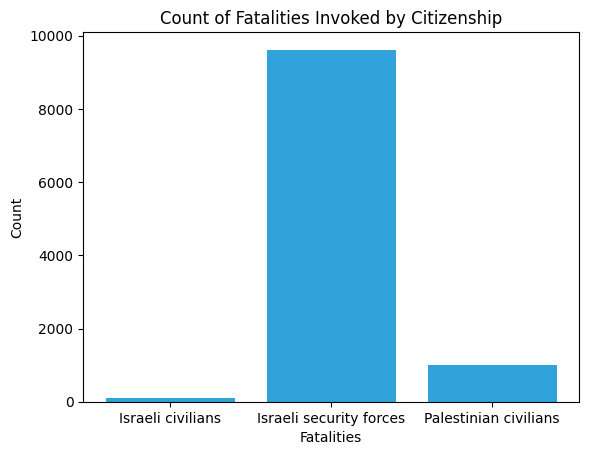

In [ ]:
plt.bar(df_killed_by['killed_by'], df_killed_by['count'], color = "#30A3DA")
plt.xlabel('Fatalities')
plt.ylabel('Count')
plt.title('Count of Fatalities Invoked by Citizenship')
plt.show()

**Insight**:
- The Israeli Security Forces is responsible for 9615 or about ~89% of the fatalities that happened in the conflict. The responsibility for a large proportion of fatalities by the Israeli Security Forces raises questions about the nature of their involvement, the tactics employed, and the potential impact on civilian populations.

5. **When** is there spikes or increase in fatalities in the conflict?

To answer this question, we would need to change the format of `date_of_event` values into a DateTime data type.

In [ ]:
df['datetime'] = pd.to_datetime(df['date_of_event'])

In [ ]:
df['datetime'].dtype

dtype('<M8[ns]')

Now we can use the same .groupby() method we've been using to group the df by `date_of_event` column and `count`.

In [ ]:
df_date = df.groupby(['date_of_event']).size().reset_index(name='count')

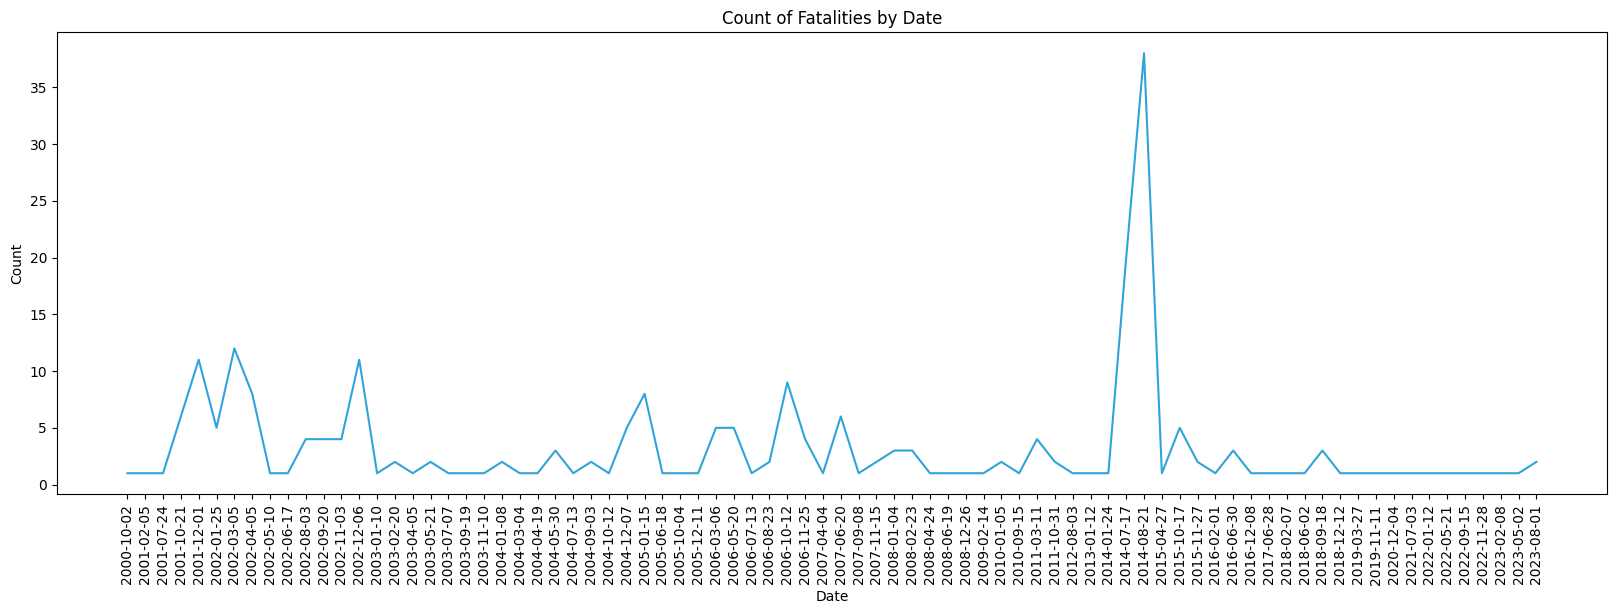

In [ ]:
plt.figure(figsize=(20, 6))
plt.plot(df_date['date_of_event'][::30], df_date['count'][::30], color = "#30A3DA")
plt.xticks(df_date['date_of_event'][::30], rotation = 90)
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Count of Fatalities by Date')
plt.show()

**Insight**:
- The graph identifies one distinct spike in conflict occurrences: between 24th of January 2014 and 27th of April 2015. These, along with the many smaller spikes indicate the long on-going conflict over the period of 23 years in Palestine.

## 5. Conclusion
- `Fatalities by Demographic Patterns`:

The affected population has a predominantly young demographic, with a mean age of 26 and a mode at 22 years old. The positive skewness suggests a concentration of younger individuals, potentially indicating the impact on a specific age group.

- `Fatalities by Ammunition (weapon) Type`:

Missiles emerge as the primary ammunition used in the conflict, with a significant increase in occurrences compared to live ammunition. This points towards the likelihood of a long-distance artillery clash.

- `Fatalities by District`:

Most conflict occurrences are concentrated in Palestinian territory, with Gaza, North Gaza, and Khan Yunis experiencing the highest frequencies.

- `Fatalities by Citizenship`:

The Israeli Security Forces are responsible for a substantial portion (~89%) of the fatalities, emphasizing their significant role in the conflict.

- `Fatalities by Date`:

Two notable spikes in conflict occurrences are identified, one between 2008-12-26 and 2009-02-14 and another between 2014-07-17 and 2014-08-21. These spikes suggest periods of intensified conflict activity, demanding a closer examination of events and triggers during these timeframes.

Link Tableau:
https://public.tableau.com/app/profile/rahardiansyah.fatoni/viz/Palestine-IsraelFatalities2000-2023/Story1

In [ ]:
df.to_csv('palestine1.csv')